<a href="https://colab.research.google.com/github/bvpkr123/github-slideshow/blob/master/Fashion_MNSIT_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing all necessary libraries

In [156]:
#Importing necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as  plt
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D, BatchNormalization
from keras.losses import categorical_crossentropy,sparse_categorical_crossentropy
from keras.optimizers import Adam,RMSprop,SGD
from sklearn.metrics import confusion_matrix,classification_report

#Importing Fashion dataset and splitting it into Train & Test
#Converting the labels to categorical of float32
#Reshaping images dataset-> scaling

In [157]:
#Loading the fashion data set and splitting Splitting MNIST dataset into train,test
(train_images, train_labels), (test_images, test_labels)=tf.keras.datasets.fashion_mnist.load_data()

In [158]:
#converting labels to categorical and with num_class as 10 ( Outputs )
print ('Before scaling',train_images[0])

#Scalling the image dataset
train_images = train_images / 255.0
test_images = test_images / 255.0

print('After scaling',train_images[0])

Before scaling [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1

# Defining Class
# Plotting first 25 images

In [159]:
#Defining 10 class name for output
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

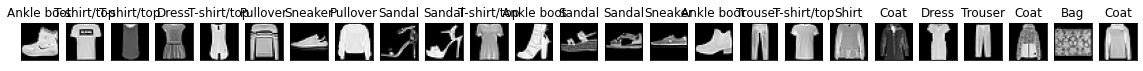

In [160]:
n=25
plt.figure(figsize=(20,4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n,i+1)
    lbl=class_names[train_labels[i]]
    plt.title(lbl)
    plt.imshow(train_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# plt.imshow(train_images[i], cmap='gray_r')


#Reshaping the train & test to 28x28x1

In [161]:
#Reshaping train_images & test_images
print('Before reshaping')
print(train_images.shape)
print(test_images.shape)

train_images=array(train_images).reshape(60000, 28,28,1)
test_images=array(test_images).reshape(10000,28,28,1)

print('After reshaping')
print(train_images.shape)
print(test_images.shape)

Before reshaping
(60000, 28, 28)
(10000, 28, 28)
After reshaping
(60000, 28, 28, 1)
(10000, 28, 28, 1)


#Building CNN for the fashion MNIST dataset

In [162]:
model = Sequential()

#Single layer perceptron
model.add(Conv2D(32, (3,3),strides=(1,1), input_shape=[28,28,1]))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_184 (Activation)  (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_62 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_124 (Dense)            (None, 128)               692352    
_________________________________________________________________
activation_185 (Activation)  (None, 128)               0         
_________________________________________________________________
dense_125 (Dense)            (None, 10)              

#Compiling the model with **Sparse Categorical Crossentropy** and fitting it

In [163]:
OPTIMIZER= Adam()
model.compile(loss='sparse_categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

history=model.fit(train_images,train_labels,batch_size=1000,epochs=30)

Epoch 1/30
60/60 [==============================] - 0s 7ms/step - loss: 0.7083 - accuracy: 0.7672
Epoch 2/30
60/60 [==============================] - 0s 7ms/step - loss: 0.4027 - accuracy: 0.8605
Epoch 3/30
60/60 [==============================] - 0s 7ms/step - loss: 0.3558 - accuracy: 0.8772
Epoch 4/30
60/60 [==============================] - 0s 7ms/step - loss: 0.3269 - accuracy: 0.8860
Epoch 5/30
60/60 [==============================] - 0s 7ms/step - loss: 0.3053 - accuracy: 0.8935
Epoch 6/30
60/60 [==============================] - 0s 7ms/step - loss: 0.2868 - accuracy: 0.8990
Epoch 7/30
60/60 [==============================] - 0s 7ms/step - loss: 0.2743 - accuracy: 0.9032
Epoch 8/30
60/60 [==============================] - 0s 7ms/step - loss: 0.2649 - accuracy: 0.9056
Epoch 9/30
60/60 [==============================] - 0s 7ms/step - loss: 0.2521 - accuracy: 0.9112
Epoch 10/30
60/60 [==============================] - 0s 7ms/step - loss: 0.2447 - accuracy: 0.9130
Epoch 11/30
60/60 [

#Compiling the model with **Categorical Crossentropy** and fitting it

In [164]:
train_labels=tf.keras.utils.to_categorical(train_labels, num_classes=10, dtype='float32')
test_labels=tf.keras.utils.to_categorical(test_labels, num_classes=10, dtype='float32')
OPTIMIZER= Adam()
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

history=model.fit(train_images,train_labels,batch_size=1000,epochs=30)


Epoch 1/30
60/60 [==============================] - 0s 8ms/step - loss: 0.1321 - accuracy: 0.9537
Epoch 2/30
60/60 [==============================] - 0s 8ms/step - loss: 0.1221 - accuracy: 0.9581
Epoch 3/30
60/60 [==============================] - 0s 8ms/step - loss: 0.1181 - accuracy: 0.9598
Epoch 4/30
60/60 [==============================] - 0s 8ms/step - loss: 0.1154 - accuracy: 0.9603
Epoch 5/30
60/60 [==============================] - 0s 8ms/step - loss: 0.1113 - accuracy: 0.9617
Epoch 6/30
60/60 [==============================] - 0s 8ms/step - loss: 0.1085 - accuracy: 0.9638
Epoch 7/30
60/60 [==============================] - 0s 8ms/step - loss: 0.1038 - accuracy: 0.9650
Epoch 8/30
60/60 [==============================] - 0s 8ms/step - loss: 0.0996 - accuracy: 0.9672
Epoch 9/30
60/60 [==============================] - 0s 8ms/step - loss: 0.0987 - accuracy: 0.9671
Epoch 10/30
60/60 [==============================] - 0s 8ms/step - loss: 0.0935 - accuracy: 0.9691
Epoch 11/30
60/60 [

#Saving the model -> Loading it again -> Evaluating to check accuracy

In [165]:
model.save('my_model.h5')

In [166]:
loaded_model = tf.keras.models.load_model('my_model.h5')
loaded_model.summary()

Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_184 (Activation)  (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_62 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_124 (Dense)            (None, 128)               692352    
_________________________________________________________________
activation_185 (Activation)  (None, 128)               0         
_________________________________________________________________
dense_125 (Dense)            (None, 10)              

In [167]:
score = loaded_model.evaluate(train_images, train_labels)
print("Test loss:", score[0])
print('Test accuracy:', score[1])

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0437 - accuracy: 0.9873
Test loss: 0.043698474764823914
Test accuracy: 0.9873166680335999


# Displaying confusion matrix and its classification report

In [168]:
Test_labels=np.argmax(test_labels,axis=1)
model_confusion_matrix=confusion_matrix(Test_labels,y_pred)
print(model_confusion_matrix)

[[840   0  15  17   7   2 111   0   8   0]
 [  1 973   2  14   4   0   5   0   1   0]
 [ 15   0 836   7  64   1  77   0   0   0]
 [ 10   4   6 913  30   0  35   0   2   0]
 [  0   0  24  22 905   0  49   0   0   0]
 [  0   0   0   0   0 978   0  12   0  10]
 [ 58   0  35  24  63   0 813   0   7   0]
 [  0   0   0   0   0   8   0 973   1  18]
 [  4   2   3   2   3   1  10   4 971   0]
 [  0   0   0   0   0   6   1  31   0 962]]


In [169]:
print(classification_report(Test_labels, y_pred, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.91      0.84      0.87      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.91      0.84      0.87      1000
       Dress       0.91      0.91      0.91      1000
        Coat       0.84      0.91      0.87      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.74      0.81      0.77      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



#Counting FP & FN from confusion matrix ie., Misclassification count

In [170]:
mis_cal_count=0
for i in range(10):
  for j in range(10):
    if i!=j:
      mis_cal_count=miss_cal_count+model_confusion_matrix[i][j]
print('Total count of Misclassification:',mis_cal_count) 

Total count of Misclassification: 836


#Evaluating with different hyperparameters 

In [173]:
epochs=[10,30,50]
batch_size=[500,1000,1500]
Optimizer=['Adam','RMSprop','SGD']
j=0
result={}
for o in range(len(Optimizer)):
  for e in range(len(epochs)):
    for b in range(len(batch_size)):
      
      #Loading data
      (train_images, train_labels), (test_images, test_labels)=tf.keras.datasets.fashion_mnist.load_data()
      
      #Scalling the image dataset
      train_images = train_images / 255.0
      test_images = test_images / 255.0
      train_images=array(train_images).reshape(60000, 28,28,1)
      test_images=array(test_images).reshape(10000,28,28,1)
      
      #Creating Basic CNN
      model = Sequential()
      model.add(Conv2D(32, (3,3),strides=(1,1), input_shape=[28,28,1]))
      model.add(Activation('relu'))
      model.add(MaxPool2D(pool_size=(2,2)))
      model.add(Flatten())
      model.add(Dense(128))
      model.add(Activation('relu'))
      model.add(Dense(10))
      model.add(Activation('softmax'))

      train_labels=tf.keras.utils.to_categorical(train_labels, num_classes=10, dtype='float32')
      test_labels=tf.keras.utils.to_categorical(test_labels, num_classes=10, dtype='float32')
      
      #Model Copilation and fitting
      model.compile(loss='categorical_crossentropy', optimizer=Optimizer[o], metrics=['accuracy'])
      model.fit(train_images,train_labels,batch_size=batch_size[b],epochs=epochs[e])
      score = model.evaluate(train_images, train_labels)
      result2[Optimizer[o]+str(epochs[e])+str(batch_size[b])]=score[1]
      print(Optimizer[o],epochs[e],batch_size[b],':',score[1])

Epoch 1/10
120/120 [==============================] - 1s 5ms/step - loss: 0.5895 - accuracy: 0.7986
Epoch 2/10
120/120 [==============================] - 1s 5ms/step - loss: 0.3706 - accuracy: 0.8702
Epoch 3/10
120/120 [==============================] - 1s 5ms/step - loss: 0.3226 - accuracy: 0.8869
Epoch 4/10
120/120 [==============================] - 1s 5ms/step - loss: 0.2905 - accuracy: 0.8972
Epoch 5/10
120/120 [==============================] - 1s 5ms/step - loss: 0.2725 - accuracy: 0.9033
Epoch 6/10
120/120 [==============================] - 1s 5ms/step - loss: 0.2500 - accuracy: 0.9115
Epoch 7/10
120/120 [==============================] - 1s 5ms/step - loss: 0.2404 - accuracy: 0.9138
Epoch 8/10
120/120 [==============================] - 1s 5ms/step - loss: 0.2243 - accuracy: 0.9206
Epoch 9/10
120/120 [==============================] - 1s 5ms/step - loss: 0.2150 - accuracy: 0.9242
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1917 - accuracy: 0.93

In [186]:
import pandas as pd
pd.DataFrame.from_dict(result2,orient='index')

,0
Adam10500,0.931650
Adam101000,0.919083
Adam101500,0.906000
Adam30500,0.984500
Adam301000,0.956633
Adam301500,0.952133
Adam50500,0.996133
Adam501000,0.978817
Adam501500,0.974317
RMSprop10500,0.936650
